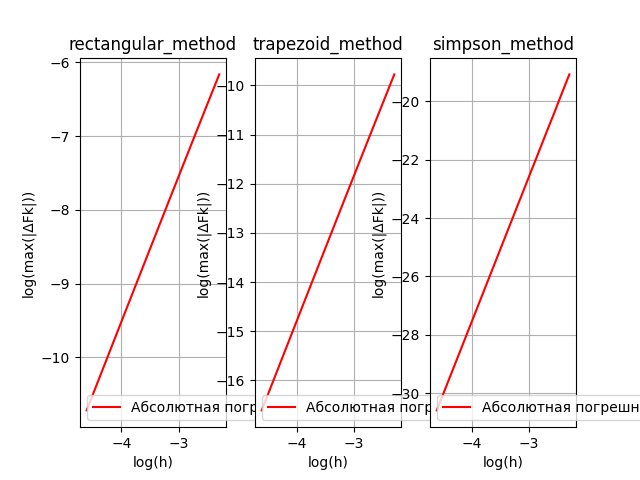


Integral = 0.1920999185229414
Rectangular rule = 0.19486416826208783
Trapezoid rule = 0.19211775440042048
Simpson rule = 0.19209991865457923


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


def func(x):
    return 1 / (2 * x ** 2 + 1)


def integ_real(a, b, f):
    res, err = quad(f, a, b)
    return res


def rectangular_rule(a, b, f):
    return f(a) * (b - a)


def trapezoid_rule(a, b, f):
    return (b - a) * (f(a) + f(b)) / 2


def simpson_rule(a, b, f):
    return (b - a) / 6 * (f(a) + 4 * f((a + b) / 2) + f(b))


def main1():
    a = 1
    b = 2
    h_array = np.arange(0.01, 0.1, 0.001)
    int1_array = []
    int2_array = []
    int3_array = []
    hlog_array = []

    for h in h_array:
        x_array = np.arange(a, b, h)
        error1 = 0
        error2 = 0
        error3 = 0
        for k in range(len(x_array) - 1):
            i1 = (integ_real(x_array[k], x_array[k + 1], func))
            i2 = (rectangular_rule(x_array[k], x_array[k + 1], func))
            error1 = max(error1, abs(i1 - i2))
            i3 = (trapezoid_rule(x_array[k], x_array[k + 1], func))
            error2 = max(error2, abs(i1 - i3))
            i4 = (simpson_rule(x_array[k], x_array[k + 1], func))
            error3 = max(error3, abs(i1 - i4))
        int1_array.append(math.log(error1))
        int2_array.append(math.log(error2))
        int3_array.append(math.log(error3))

    h_array = np.log(h_array)
    dfr_array = [0, int1_array, int2_array, int3_array]
    method = [0, 'rectangular_method', 'trapezoid_method', 'simpson_method']

    for i in range(3):
        i += 1
        plt.subplot(1, 3, i)
        plt.title(method[i])
        plt.xlabel("log(h)")
        plt.ylabel("log(max(|ΔFk|))")
        plt.grid()
        plt.plot(h_array, dfr_array[i], label="Абсолютная погрешность", color='red')
        plt.legend()
    plt.show()


def main2():
    a = 1
    b = 2
    n = 40
    h = (b - a) / n
    x_array = np.arange(a, b, h)
    integral_real = 0
    integral1 = 0
    integral2 = 0
    integral3 = 0
    for k in range(len(x_array) - 1):
        integral_real += (integ_real(x_array[k], x_array[k + 1], func))
        integral1 += (rectangular_rule(x_array[k], x_array[k + 1], func))
        integral2 += (trapezoid_rule(x_array[k], x_array[k + 1], func))
        integral3 += (simpson_rule(x_array[k], x_array[k + 1], func))
    print()
    print('Integral =', integral_real)
    print('Rectangular rule =', integral1)
    print('Trapezoid rule =', integral2)
    print('Simpson rule =', integral3)


main1()
main2()
